In [52]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [53]:
df_pakistan=df[df['job_country']=='Pakistan'].copy()

In [54]:
df_pakistan['job_posted_month']=df_pakistan['job_posted_date'].dt.strftime('%B')



In [55]:
df_pakistan_pivot=df_pakistan.pivot_table(index='job_posted_month', columns="job_title_short", aggfunc='size')

In [56]:
df_pakistan_pivot.reset_index(inplace=True)
df_pakistan_pivot['month_no']=pd.to_datetime(df_pakistan_pivot['job_posted_month'],format='%B').dt.month

df_pakistan_pivot.sort_values('month_no', inplace=True)

df_pakistan_pivot.set_index('job_posted_month', inplace=True)

df_pakistan_pivot.drop(columns='month_no',inplace=True)

In [57]:
df_pakistan_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,12,5,39,89,65,14,6,16,14,35
February,10,5,19,45,28,9,3,17,11,28
March,13,2,26,65,33,14,5,13,15,21
April,7,2,22,39,15,6,1,13,8,7
May,3,1,12,47,22,19,1,10,4,6
June,10,5,15,46,33,12,2,7,2,12
July,6,3,18,50,23,22,1,15,7,26
August,7,5,21,44,16,11,1,7,13,32
September,9,4,27,47,29,26,3,14,8,27


<Axes: xlabel='job_posted_month'>

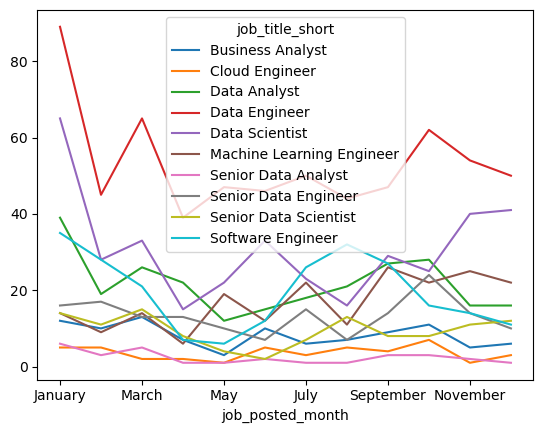

In [60]:
df_pakistan_pivot.plot(kind='line')

In [71]:
top_5=df_pakistan['job_title_short'].value_counts().head(5)
top_5 =top_5.index.tolist()

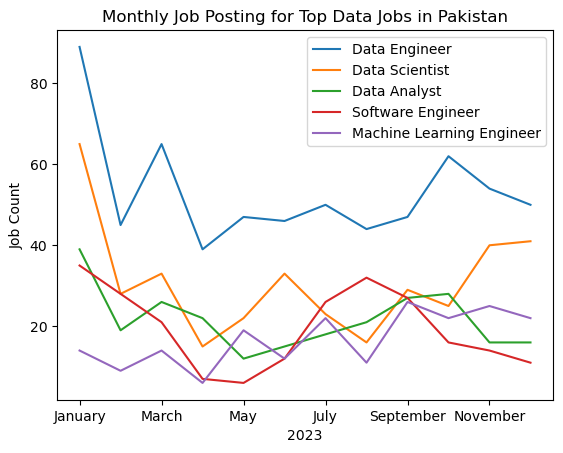

In [83]:
df_pakistan_pivot[top_5].plot(kind="line")
plt.title("Monthly Job Posting for Top Data Jobs in Pakistan")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.legend()
plt.show()